# realted code about least square method

## basic example

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [8]:
# target function
def real_func(x):
    return np.sin(2*np.pi*x)

#polynomial function
def fit_func(p,x):
    f = np.poly1d(p)
    return f(x)

#residual error
def residual_func(p,x,y):
    return fit_func(p,x)-y

In [23]:
#test sets(including 10 data)
x=np.linspace(0,1,10)
x_points=np.linspace(0,1,100)

#add norm noise
y_=real_func(x)
y=[np.random.normal(0,0.1)+y1 for y1 in y_]

def fitting(M=0):
    p_init=np.random.rand(M+1)
    p_lsq=leastsq(residual_func,p_init,args=(x,y))
    
    # figures
    plt.plot(x_points,real_func(x_points),label="real curve")
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label='fitted curve')
    plt.plot(x, y, 'bo', label='noise added real data')
    plt.legend()
    return p_lsq

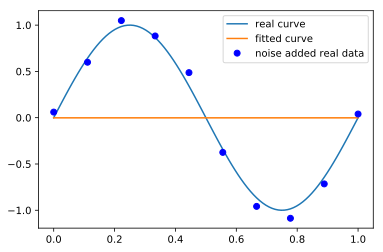

In [24]:
p_lsq_0=fitting(M=0)

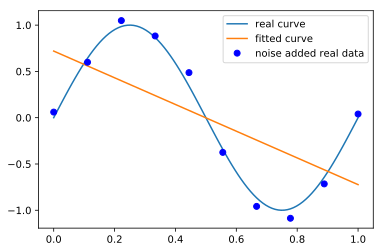

In [25]:
p_lsq_0=fitting(M=1)

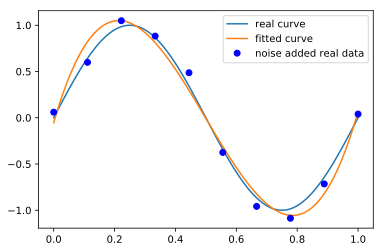

In [26]:
p_lsq_0=fitting(M=3)

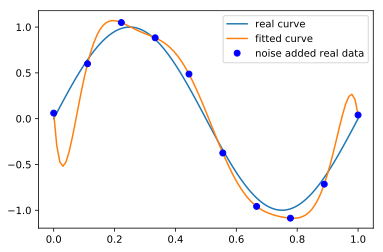

In [27]:
p_lsq_0=fitting(M=9)

## Regularization

In [34]:
regularization=0.0001

def residuals_func_regularization(p,x,y):
    ret=fit_func(p,x)-y
    ret=np.append(ret,np.sqrt(0.5*regularization*np.square(p)))
    # L2范数
    
    return ret

In [35]:
p_init=np.random.rand(10)
p_lsq_regularization=leastsq(residuals_func_regularization,p_init,args=(x,y))

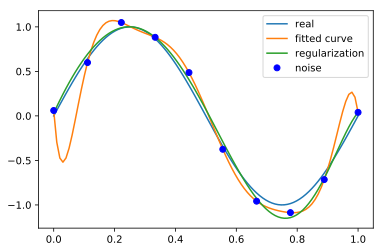

In [36]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_0[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()